<h1>Actividad final de Inteligencia Artificial </h1>
<HR>

**Integrantes:**
- Juan Castellanos. Código: 2162119
- Iván Castillo. Código: 2160023
- Gabriela Vega. Código: 2161671

# Ejercicio 1

**Problema:** Se desea minimizar el volumen de un cilindro, ya que el objetivo de la empresa Vive100% es optimizar costos en la elaboración de latas para bebidas energéticas.

<center><img src="https://agrega.juntadeandalucia.es/repositorio/28032017/82/es-an_2017032812_9132906/cilindro.jpg" border="1.5" width="500px"> <img src="https://s.cornershopapp.com/product-images/117879.jpg" border="1.5" width="270px"></center>

Se tienen dos parámetros para la solución del problema: 

- Diámetro (d)
- Altura (h)

Además, existe un requerimiento o  restricción de la Empresa: los cilindros deben tener al menos 300ml. <br>
El **planteamiento** del problema es el siguiente:

$\text{funcion objetivo f:} \min d(d,h) = c (\frac{\pi d^2}{2}+\pi dh),\\     \text{funcion de restrinccion g:} \               g_1(d,h) = \frac{\pi d^2h}{4} \geq 300,\\     \text{Acotamiento:} \\           d_{\min} \leq d \leq d_{\max}, \\                h_{\min} \leq h \leq {h_\max} \\c = 0.58 \text{ (costo del material por centimetro cubico)} $


### Solución
- El código se desarrolla con POO para facilitar el proceso de optimización (algoritmo genético) con implementación de métodos contenidos en la Clase Optimizar.  
- La Clase Optimizar posee atributos para generar datos que se requieran en cada paso. 
- Se aplicára transformación de valores enteros a binarios y así trabajar con el algoritmo.

<H3>Pasos del algoritmo</H3>

#### **1.** Representación de los individuos
**Interpretación:** Si se desea encontrar el mínimo en el intervalo [0-32] se puede representar a los individuos como *números binarios*; en este caso como números binarios de longitud 5 (gensize). Con un numero binario de 5 bits podremos representar 32 números (2^5=32) con lo cual decimos que: los individuos van a estar representados por un gen de longitud 5.

#### **2.** Condiciones iniciales (Parámetros)
- Longitud del gen: 5
- Conjunto de elementos del gen: {0,1}
- Número de poblaciones: 10
- Número de características para cada individuo: 2
 - 1 característica para d
 - 1 característica para h
 - Se le denomina pair [d,h]: tipo lista
- Para la creación de la primera poblacion:
  - Se toman muestras de una distribución uniforme aleatoria:
    - Intervalo de solución (low, high): [0,32]
    - Tamaño (n): 10
- Número de generaciones: 10

#### **3.** Definición de Fitness
Se definen dos funciones en el algoritmo teniendo en cuenta el planteamiento del problema. Estas funciones calculan y sirven para efectuar la comparación de calidad de los individuo con los valores de diámetro y valores de altura, los cuales se generan a partir de las funciones *f y g*.

#### **4.** Definición de Reproducción
Tanto para el cruzamiento como la mutación se tiene en cuenta que en una solución o individuo se encuentran dos atributos, no solamente uno. Por tal razón, el algoritmo genético se trabaja con el cruce de ambos strings *binarios* que contienen dichas características.
- 4.1. Cruzar
- 4.2. Mutar

#### **5.** Montaje o Assembling
Se utiliza selección por torneo para encontrar soluciones buenas y eliminar soluciones que puede insertarse en soluciones eficientes durante la ejecucipon del algoritmo.

---

## Desarrollo del algoritmo
El algoritmo cuenta con comentarios donde se encuentra la información del proceso detalladamente.

In [0]:
#Ejercicio 1 - Librerías
import numpy as np
from math import pi, pow
import matplotlib.pyplot as plt

In [0]:
# ---------------------------------------------------------------
# Ejercicio de Algoritmo Genético para IA (2019-2)
# Optimización de función objetivo de volumen de un cilíndro.
# (C) 2020 Iván Castillo, Juan Castellanos, Gabriel Vega
# ----------------------------------------------------------------

class Optimizar:
    
    # -----------------------------------------------------------
    # |||             2. CONDICIONES INICIALES                |||
    # -----------------------------------------------------------
    #--Descripción de parametros y atributos--
    
    #maxsol: Límite superio para generar población para valores de d y h.
    #--------Intervalo de solución [0,32]
    
    #gensize: Longitud del gen (5)

    #term: Indica el número de generaciones máximas a generar.
    #-------Limita la ejecución del algoritmo hasta 10 genereacioens.
    #-------empieza desde cero, entonces term = 9

    #best: Lista con valores iniciales para la evaluación de aptitud.
    #-------["indice para valor de d", "indice para valor de h"]

    #Constructor _init_ con atributos para la ejecución del algoritmo.
    def __init__(self, n=10, maxsol=32, gensize=5, term=9):
        self.n = n
        self.maxsol = maxsol
        self.pob = []
        self.gen = 0
        self.gensize = gensize
        self.term = term
        self.best = [100000000000000,0]
        np.random.seed()

    # Genera la población inicial para individuos según el valor de maxsol.
    # (en este caso las variables d y h)
    def generar_poblacion(self):
        # Genera pares aleatorios (dv y dh).
        #  Muestras de una distribución uniforme aleatoria
        dv = np.random.uniform(low=0, high=self.maxsol, size=self.n)
        hv = np.random.uniform(low=0, high=self.maxsol, size=self.n)

        # Posteriormente convierte d y h en binarios para cada i poblacion. 
        # Llena con ceros con zfill para definir el gen de cada individuo.
        print("Población inicial generada: ")
        for i in range(len(dv)):
            d = "{0:b}".format(int(dv[i]))
            h = "{0:b}".format(int(hv[i]))
            d = d.zfill(self.gensize)
            h = h.zfill(self.gensize)
            print(str(i),":",str(d),str(h))
            #Agregar nuevo individuo a población
            self.pob.append([d,h,i])    




    # -----------------------------------------------------------
    # |||                    3. FITNESS                       |||
    # -----------------------------------------------------------
    # pair: tipo de dato lista que representa el individuo.
    # pair[0]: valor de diametro (d)
    # pair[1]: para valor de altura (h)

    # Definición de la función f
    # coste = 0.58
    def f(self, pair):
        d = 0.58*(float(int(pair[0],2)))
        h = float(int(pair[1],2))
        res = ((pi*pow(d,2))/2) + pi*d*h
        return res

    # Definición de la función g (restrincción)
    def g(self,pair):
        d = float(int(pair[0],2))
        h = float(int(pair[1],2))
        res = ((pi*pow(d,2)*h)/4)-300
        return res




    # -----------------------------------------------------------
    # |||                    4.  REPRODUCCIÓN                 |||
    # -----------------------------------------------------------
    
    # -----------------------------------------------------------
    # |||                    4.1.  CRUZAR                     |||
    # -----------------------------------------------------------
    def cross(self, pair1, pair2):
        #Se realiza el cruce dos individuos con asignación del punto de Cruce.

        #a1: valor d para 1er individuo
        #b1: valor h para 1er individuo
        a1 = pair1[0]
        b1 = pair1[1]

        #a2: valor d para 2do individuo
        #b2: valor h para 2do individuo
        a2 = pair2[0]
        b2 = pair2[1]

        #Int Random 1 - Valor d
        #Se generan Randómicos enteros entre 2 y 7
        #Esto con el fin de asignar el punto de cruce de los individuos.
        fin = np.random.randint(2,7)
        
        #Cruzar 1 - Generar nuevos d. Se recorre el string con _fin_
        #Se concatenan los values
        na1 = a1[:fin] + b2[fin:]
        nb1 = b1[:fin] + a2[fin:]

        #Int Random 2 - Generar nuevos h. Se recorre el string con _fin_
        #Se generan Randómicos enteros entre 2 y 7
        #Esto con el fin de asignar el punto de corte de los individuos.
        fin = np.random.randint(2,7)

        #Cruzar 2 - Generar nuevos h. Se recorre el string con _fin_
        #Se concatenan los values
        na2 = a2[:fin] + b1[fin:]
        nb2 = b2[:fin] + a1[fin:]

        #Retorna nuevo individuo tipo lista con sintaxis [d,h]
        return [[na1, nb1], [na2,nb2]]

    # -----------------------------------------------------------
    # |||                    4.2.  MUTAR                      |||
    # -----------------------------------------------------------
    # Función que genera mutación de los individuos
    def mutt(self, pair):
        new = []

        #se convierte a tipo array los pares [d, h] respectivos p1 y p2
        p1 = np.array(list(pair[0]))
        p2 = np.array(list(pair[1]))

        #Shuffle revuelve los cromosomas de los individuos
        np.random.shuffle(p1)
        np.random.shuffle(p2)
        
        #se anida espacio en la mutación en la lista new
        #new representa el nuevo individuo mutado
        pn1 = "".join(p1)
        pn2 = "".join(p2)
        new.append(pn1)
        new.append(pn2)
        return new
        



    # -----------------------------------------------------------
    # |||                    4.2.  ASSEMBLING                 |||
    # -----------------------------------------------------------
    #Ciclo principal
    def ejecutar(self):
        self.data = []
        while True:
            print("\n /´´´´´´´´´´´´ Nueva Generación ´´´´´´´´´´´´´/ ")
            #Se invoca el fitness
            for pair in self.pob:
                res = self.g(pair)
                cond = self.f(pair)


                # Guardar si es el mejor elemento en lista 
                if res > 0:
                    if self.best[0] > cond:
                        self.best = [cond, pair]
                        
                # Si no se ha alcanzado la condición de término de ejecución del programa.
                #Es decir, si hay 10 generaciones e imprime la solucion encontrada 2
                if not self.term:
                    if res > 0:
                        print("Solución encontrada 1: ", str(self.best),end=" ")
                        # print(res, cond)
                        return pair
                else:
                    if self.gen > self.term:
                        print("Detener algoritmo. Ya se generó el número máximo de generaciones.")
                        print("\n \n")
                        print("■ Solución encontrada ■ \n", str(self.best), end=" ")
                        print("Volumen:", str(300+self.g(self.best[1])))
                        print("Valor (d):", str(int(self.best[1][0],2)))
                        print("Valor (h):", str(int(self.best[1][1],2)))
                        return self.best

            # Se verifica la condición de término de generacion. Luego,  pasa a 
            # crear la nueva generación si se cumple.
            new_gen = []
            i = 0
            count = 0

            # Genera nueva población por cruzamiento
            while i < ((len(self.pob))/4):
                
                # Selecciona aleatoria oponentes
                r = np.random.uniform(0, len(self.pob), size=2)
                j = int(r[0])
                k = int(r[1])
                #Torneo número (1)
                if self.f(self.pob[j]) < self.f(self.pob[k]):
                    winner1 = j
                else:
                    winner1 = k

                # Selecciona aleatoriamente los individuos a disputar
                r = np.random.uniform(0, len(self.pob), size=2)
                j = int(r[0])
                k = int(r[1])
                #Torneo número ()
                if self.f(self.pob[j]) < self.f(self.pob[k]):
                    winner2 = j
                else:
                    winner2 = k

                # Ahora hacemos la cruza de los mejores individuos
                elem = self.cross(self.pob[winner1], self.pob[winner2])
                elem[0].append(count)
                count += 1
                elem[1].append(count)
                count += 1

                # Agregar a la nueva generación
                new_gen.append(elem[0])
                new_gen.append(elem[1])
                i += 1
            i = 0

            #Se realiza la mutacion a través del ciclo while que 
            #toma como logitud la logintud población
            while count < len(self.pob)-1:

                # Seleccionar primer individuo para mutar
                r = np.random.randint(0,len(self.pob))
                e = self.mutt(self.pob[r][:2])
                e.append(count)
                # print(e)
                new_gen.append(e)
                count += 1

                # Seleccionar segundo individuo para mutar
                r = np.random.randint(0,len(self.pob))
                e = self.mutt(self.pob[r][:2])
                e.append(count)
                new_gen.append(e)
                count += 1
                i += 1
            self.pob = new_gen 
            # Se realiza la transformación a Binario
            if self.best[1] == 0:
                x1 = np.random.uniform(low=0, high=self.maxsol)
                x2 = np.random.uniform(low=0, high=self.maxsol)
                d = "{0:b}".format(int(x1))
                d = d.zfill(self.gensize)
                
                h = "{0:b}".format(int(x2))
                h = h.zfill(self.gensize)
                
                self.best[0] = self.f([d,h])
                self.best[1] = [d,h]

            # Se agregar el mejor de la generación a la próxima generación
            best = self.best[1]
            best.append(count)
            self.pob.append(best)
            self.gen += 1

            self.data.append([self.gen, self.best]) 
            print("Mejor solución de la generación: ", str(self.best))
            print("Volumen:", str(300+self.g(self.best[1])))
            print("Valor (d):", str(int(self.best[1][0],2)))
            print("Valor (h):", str(int(self.best[1][1],2)))
            # input();
    
    def dibujar(self):
        print("\n ")
        x = [i[0] for i in self.data]
        y = [int(i[1][0]) for i in self.data]
        print("Generaciones",x)
        print("Mejores elementos por generación",y)
        plt.figure(figsize=(10,5))
        plt.plot(x,y)
        plt.title("Evolución del volúmen del cilindro por cada generación")
        plt.xlabel("Generaciones")
        plt.ylabel("Volúmen de lata")
        plt.show()

    #Método que grafica los valores encontrados en forma de cilindros
    def dibujar3D(self): 
        d  = int(self.best[1][0],2)
        h  = int(self.best[1][1],2)
        center = 0
        
        fig = plt.figure(figsize=(8,10))
        ax = Axes3D(fig, azim=30, elev=30)
        x=np.linspace(center-d, center+d, 100)
        z=np.linspace(0, h, 100)
        Xc, Zc=np.meshgrid(x, z)
        Yc = np.sqrt(d**2 -(Xc - center) ** 2) + center 
        # Draw parameters
        rstride = 20
        cstride = 10
        ax.plot_surface(Xc, Yc, Zc, alpha=0.2, rstride=rstride, cstride=cstride)
        ax.plot_surface(Xc, (2*center-Yc), Zc, alpha=0.2, rstride=rstride, cstride=cstride)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        ax.set_title("Gráfica del cilindro con la mejor optimización de todas")

        plt.show()

---

## Ejecución del algoritmo

In [0]:
#Creo objeto con instacioa de la clase optimizar. Preparación      
optimizo = Optimizar()

In [244]:
optimizo.generar_poblacion()

Población inicial generada: 
0 : 01101 00101
1 : 00100 01111
2 : 00000 01111
3 : 11000 00100
4 : 00101 11000
5 : 00111 00001
6 : 00001 00000
7 : 10101 10110
8 : 10111 00000
9 : 10011 11011


In [245]:
optimizo.ejecutar()    


 /´´´´´´´´´´´´ Nueva Generación ´´´´´´´´´´´´´/ 
Mejor solución de la generación:  [207.7403274927479, ['01101', '00101', 0, 10]]
Volumen: 663.6614480708438
Valor (d): 13
Valor (h): 5

 /´´´´´´´´´´´´ Nueva Generación ´´´´´´´´´´´´´/ 
Mejor solución de la generación:  [162.1690127783051, ['01010', '00110', 7, 10]]
Volumen: 471.23889803846896
Valor (d): 10
Valor (h): 6

 /´´´´´´´´´´´´ Nueva Generación ´´´´´´´´´´´´´/ 
Mejor solución de la generación:  [162.1690127783051, ['01010', '00110', 7, 10, 10]]
Volumen: 471.23889803846896
Valor (d): 10
Valor (h): 6

 /´´´´´´´´´´´´ Nueva Generación ´´´´´´´´´´´´´/ 
Mejor solución de la generación:  [162.1690127783051, ['01010', '00110', 7, 10, 10, 10]]
Volumen: 471.23889803846896
Valor (d): 10
Valor (h): 6

 /´´´´´´´´´´´´ Nueva Generación ´´´´´´´´´´´´´/ 
Mejor solución de la generación:  [141.19636854147038, ['01001', '00110', 9, 10]]
Volumen: 381.7035074111599
Valor (d): 9
Valor (h): 6

 /´´´´´´´´´´´´ Nueva Generación ´´´´´´´´´´´´´/ 
Mejor solución d

[121.28055607330323, ['01000', '00110', 5, 10]]


 
Generaciones [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Mejores elementos por generación [207, 162, 162, 162, 141, 141, 141, 141, 141, 121]


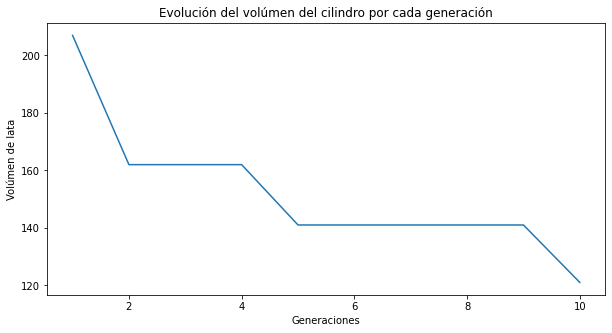

In [246]:
optimizo.dibujar()   

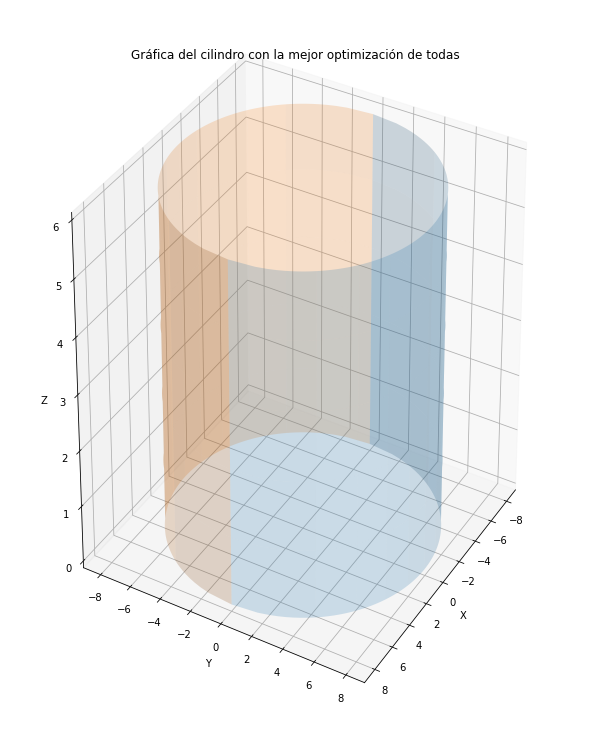

In [247]:
# Gráfica del cilindro con el mejor mínimo para d y h hallado respectivamente.
optimizo.dibujar3D()

---

# Ejercicio 2

**Problema:** Un golfista quiere jugar los 18 hoyos de un campo de golf,  sin embargo, su carrito de golf solo cuenta con gasolina para recorrer 120 km, ¿existe alguna manera para que el golfista pueda recorrer los 18 hoyos sin quedarse sin gasolina?, ¿Si no existe alguna manera cuando Tendría que caminar el golfista para volver al hoyo donde empezó a jugar?

<center><img src="https://static.vecteezy.com/system/resources/previews/000/190/757/non_2x/top-view-golf-course-illustration-vector.jpg" width="500px"></center>


In [0]:
#Ejercicio 2 - Librerías
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
w_size = 30 #kilometros
n_holes = 18
holes = (np.random.random((n_holes,2))*w_size).astype(int) 
print( holes)

[[24 11]
 [ 4  5]
 [12 13]
 [ 9 18]
 [14 12]
 [11 29]
 [21  5]
 [ 8 14]
 [ 1 25]
 [12 17]
 [24 20]
 [22 29]
 [ 0 21]
 [27 26]
 [ 0 24]
 [18  7]
 [24 14]
 [ 0 12]]


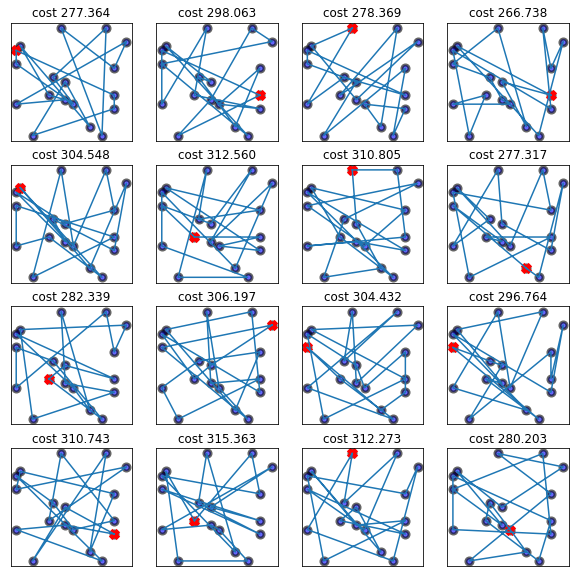

In [0]:
def TSP_plot_solution(holes, solution):
    plt.scatter(holes[:,0], holes[:,1],s=50, c= "blue", alpha=0.6, edgecolors="black", linewidths=3 ) 
    plt.plot(holes[solution,0].tolist()+[holes[solution[0],0]], holes[solution,1].tolist()+[holes[solution[0],1]])
    plt.scatter(holes[solution[0],0], holes[solution[0],1], marker="x", s=60, c="red", lw="5")
    plt.title("cost %.3f"%(TSP_cost(holes, solution)))
    
def TSP_cost(holes, solution):
    sol_holes = holes[solution]
    return np.sum(np.sqrt(np.sum((sol_holes - np.roll(sol_holes,-1, axis=0))**2, axis=1)))

fig = plt.figure(figsize=(10,10))
for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    one_solution = np.random.permutation(n_holes)
    TSP_plot_solution(holes, one_solution)
    ax.set_xticks([])
    ax.set_yticks([])

In [0]:
def TSP_initialize_population(n_individuals, n_holes):
    r = []
    for i in range(n_individuals):
        r.append(np.random.permutation(n_holes))
    return np.array(r)

In [0]:
def TSP_mutate(solution, mutation_prob):
    mutated_solution = np.copy(solution)
    for i in range(len(solution)):
        if np.random.random()<mutation_prob:
            j = i+1 if i!=len(solution)-1 else 0
            tmp = mutated_solution[i]
            mutated_solution[i] = mutated_solution[j]
            mutated_solution[j] = tmp
    return mutated_solution

In [0]:
def TSP_cross_over(solution1, solution2):
    l = len(solution1)
    cstart = np.random.randint(l)
    cend   = np.random.randint(l-cstart)+cstart+1
    r = np.zeros(l)
    s1part = solution1[cstart:cend]
    r[cstart:cend] = s1part
    c = 0
    for i in range(l):
        c = cend if c==cstart else c
        if not solution2[i] in s1part:
            r[c]=solution2[i]
            c += 1
            
    return r


In [0]:
def TSP_plot_GA_result(best, bests, means, stds):
    fig = plt.figure(figsize=(12,4))
    fig.add_subplot(121)
    plot_evolution(bests, means, stds)
    fig.add_subplot(122)
    TSP_plot_solution(holes, best)

In [0]:
%%writefile ../code/ga.py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
def plot_evolution(bests, means, stds):
    plt.plot(means, label="means")
    plt.plot(bests, label="bests")
    plt.fill_between(range(len(means)), means-stds, means+stds, color="yellow", alpha=0.2)
    plt.legend()
def run_ga(pop_size, init_population_function, 
           mutation_function, crossover_function, cost_function, 
           crossover_prob, mutation_prob, n_iters):

    pop = init_population_function(pop_size)
    n_xover_indivs = int(pop_size * crossover_prob)

    means = []
    stds  = []
    best_costs = []
    best = None

    for i in tqdm(range(n_iters)):
        offsprings = []
        permut_temp = np.random.permutation(len(pop))
        idx_xover_indivs = permut_temp[n_xover_indivs:]
        for idx in idx_xover_indivs:
            idx_counterpart = np.random.randint(len(pop))
            i1 = pop[idx]
            i2 = pop[idx_counterpart]
            offs = crossover_function(i1,i2)
            offsprings.append(offs)
        offsprings = np.array(offsprings)
        pop = np.vstack((pop, offsprings)).astype(int)
        # mutate population
        for j in range(len(pop)):
            pop[j] = mutation_function(pop[j], mutation_prob)
        # select best to maintain pop_size fixed
        costs = np.array([cost_function(j) for j in pop])
        top_idxs  = np.argsort(costs)[:pop_size]
        pop = pop[top_idxs]
        costs = costs[top_idxs]
        means.append(np.mean(costs))
        stds.append(np.std(costs))
        best_costs.append(np.min(costs))   
        if best is None or np.min(costs) < cost_function(best):
             best = pop[np.argmin(costs)]
    means      = np.array(means)
    stds       = np.array(stds)
    best_costs = np.array(best_costs) 
    return best, best_costs, means, stds
    


Overwriting ../code/ga.py



mejor ruta= [16  6 15  0  4  2  9  3  7  1 17 12 14  8  5 11 13 10]


<Figure size 432x288 with 0 Axes>

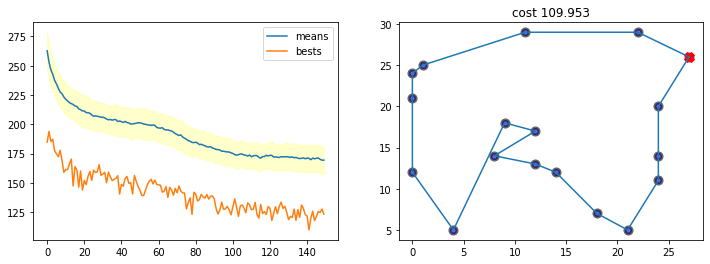

In [0]:
%run ../code/ga.py

r =  run_ga(pop_size=1000, 
               init_population_function = lambda x: TSP_initialize_population(x, n_holes), 
               mutation_function        = TSP_mutate, 
               crossover_function       = TSP_cross_over,
               cost_function            = lambda x: TSP_cost(holes, x), 
               crossover_prob           = 0.01,
               mutation_prob            = 0.2, 
               n_iters                  = 150)
print('mejor ruta=', best)

best, best_costs, means, stds = r
TSP_plot_GA_result(best, best_costs, means, stds)

como podemos observar, cada vez que se ejecute el código nuestro campo de golf va cambiar la posición de los hoyos, para este problema se implemento el mismo código que se en cuentra en el notebook 14 para tener un mejor entendimiento del uso de los algoritmos geneticos, para el ejercicio el coste es la gasolina que se necesita para jugar en todos los hoyos y best nos imprime la mejor ruta para el jugador


En el segundo caso las mutaciones se incrementan para reprentar las irregularidades que existe en el terreno



mejor ruta= [13 11  5 12 14  8 17  7  9  3  1 15  0  6  2  4 16 10]
gasolina faltante 23.467265588082284


<Figure size 432x288 with 0 Axes>

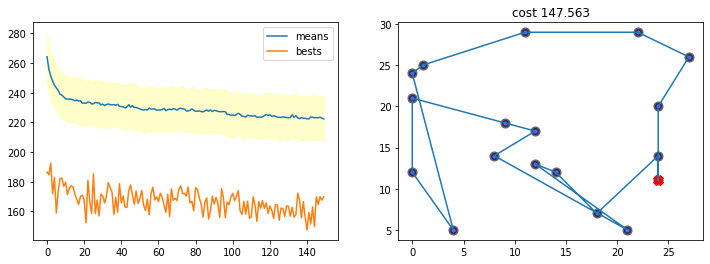

In [0]:
%run ../code/ga.py

r =  run_ga(pop_size=1000, 
               init_population_function = lambda x: TSP_initialize_population(x, n_holes), 
               mutation_function        = TSP_mutate, 
               crossover_function       = TSP_cross_over,
               cost_function            = lambda x: TSP_cost(holes, x), 
               crossover_prob           = 0.01,
               mutation_prob            = 0.4, 
               n_iters                  = 150)
print('mejor ruta=', best)
print('gasolina faltante',abs(120 - min(best_costs)))

best, best_costs, means, stds = r
TSP_plot_GA_result(best, best_costs, means, stds)

#Ejercicio 3

**Problema:** Aproximación por división entre números tipo entero del numero PI

<center><img src="https://media1.giphy.com/media/QMjUSsXCXHcqI/giphy.gif" border="5px" width="380px"></center>
<br>
<H3>Solución</H3>

  - Se basa en aproximar el número *PI* (el cual representaremos con tipo  float) mediante la operación aritmética de división entre un valor de númerador y valor de *denominador*; esta operacion es el fitness o score para realizar comparaciones. 

  - Para una aproximación más acertada en las operaciones aritméticas se utiliza los máximos digitos de precisión para* PI*, del formato Decimal de Python.

  - Para una aproximación más acertada en las operaciones aritméticas se utiliza los máximos digitos de precisión para el valor del *numerador* y el valor del *denominador*, formatos de tipo entero.

  - Se codifica un algoritmo genético que se adapta al planteamiento de problema, teniendo en cuenta que los *animales* (individuos) más aptos son las mejores soluciones que se aproximan a *PI.*

  - Como característica importante se agrega edad a los indiviudos para cada generacion; por lo tanto, se complementa una nueva funcionalidad junto con las vistas en clase.

  - Otra característica importante que se agrega una funcion de matar a los más debiles cuando existe saturación o sobrepoblación  en el mundo; por lo tanto, se complementa una nueva funcionalidad junto con las vistas en clase.

  - **Finalmente, las mejores soluciones se va ordenando de forma ascendente, despreciando los valores de pi más alejados para cada cada generación; Por lo tanto, el resultado final de la generación final es la mejor solución de todas las soluciones.**
 

*Desarollo y Ejecución del Algoritmo*
- edad máxima = 5
- generaciones máximas = 100 
- población máxima = 10000  # para matar por sobrepoblacion
- poblacion inicial = 300
- máxima distancia hasta pi = 2: se asigna para matar individuos 'debiles' (factor de calidad)

*Para más información de cómo se realizó el código, documentamos lo máximo posible para que quede claro el proceso y así justificar de manera cada línea.*

In [0]:
#Ejercicio 3 - Librerías
import random
import time
from decimal import *

In [93]:
# ---------------------------------------------------------------
# Ejercicio de Algoritmo Genético para IA (2019-2)
# Aproximación por división entre enteros del numero PI.
# (C) 2020 Iván Castillo, Juan Castellanos, Gabriel Vega
# ----------------------------------------------------------------

MAX_INT = 2147483647
#PI es e
PI = Decimal(3.141592653589793)
# Nota: no se puede obtener la precisión mejor que 15 dígitos más allá
# del punto decimal. Esto es una limitación fundamental de float
# doc: https://docs.python.org/3.1/tutorial/floatingpoint.html

def grupos_string(string):
    return " ".join([string[i:i+3] for i in range(0, len(string), 3)])

CTE_PI = '{0:.15f}'.format(PI)
FORMATO_PI = grupos_string(CTE_PI)

def fitness(pi_approx):
    # Obtiene la distancia absoluta entre la aproximación animal de pi y el valor real de pi
    return abs(Decimal(PI) -
               Decimal(pi_approx))  # distancia desde pi (hasta 30 digitos)


class Animal():
    def __init__(self, numerador=None, denominador=None):
        #Genera un animal aleatorio si no se especifican numerador y denominador 
        #(durante la reproducción)
        self.numerador = numerador if(numerador) else random.randint(
            1, MAX_INT)
        self.denominador = denominador if(denominador) else random.randint(
            1, MAX_INT)
        self.edad = 0
        self.fitness = fitness(self.get_pi())

    def get_pi(self):
        return Decimal(self.numerador) / Decimal(self.denominador)


class Configurar():
    def __init__(self):
        # Establece las condiciones iniciales para el mundo.
        # El cambio de diferentes parámetros afecta la
        # precisión de la aproximación de pi
        self.max_edad = 5
        self.max_generaciones = 100
        self.max_poblacion = 10000  # para matar por sobrepoblacion
        self.inicial_poblacion = 300
        self.max_distancia_de_pi = 1  # para matar animales 'debiles'
        self.mutacion_porcentaje = 0.000001

    def __str__(self):
        return 'Configuración del mundo: ' + str(self.__dict__) + '\n'


class Mundo():
    def __init__(self, configuracion):
        self.animales = []
        self.llenar_mundo(configuracion.inicial_poblacion)
        self.ordenar_animales()

    def llenar_mundo(self, population):
        #Generar Poblacion inicial en un mundo nuevo
        while len(self.animales) < population:
            animal = Animal()
            self.animales.append(animal)

    def ordenar_animales(self):
        #Los animales que más se aproximan a pi se organizan 
        #ascendentemente en la lista de animales del mundo
        self.animales.sort(key=lambda x: x.fitness)

    def get_padres(self, l):
        #Generar pares de padres para hacer hijos
        for i in range(0, len(l), 2):
            to_yield = l[i:i + 2]
            if len(to_yield) % 2 == 0:
                yield to_yield

    def reproducir_animales(self, mutacion):
        #Agrega nuevos animales al mundo al producir 
        #un nuevo hijo a partir de parejas de animales existentes
        padre_pares = list(self.get_padres(self.animales))
        for pair in padre_pares:
            child = self.nuevo_hijo(pair[0], pair[1], mutacion)
            self.animales.append(child)
        self.ordenar_animales()

    def nuevo_hijo(self, padre, madre, mutacion):
        #Agrega un nuevo animal al mundo usando una mezcla de otros "genes" 
        #de otros animales, y luego muta el resultado para simular
        num = (padre.numerador + madre.numerador) / 2
        den = (padre.denominador + madre.denominador) / 2

        if random.randint(0, 1):  # Generar ramdóm para escoger el indice.
            num = num * (1 + mutacion)
        else:
            num = num * (1 - mutacion)

        if random.randint(0, 1):
            den = den * (1 + mutacion)
        else:
            den = den * (1 - mutacion)

        return Animal(round(num), round(den))

    def matar_animales_viejos(self, edad):
        animales_restantes = [i for i in self.animales if i.edad < edad]
        self.animales = animales_restantes

    def edad_animales(self):
        #Aumentar la edad de cada animal para que 
        #luego podamos matar animales viejos
        for animal in self.animales:
            animal.edad += 1

    def matar_animales_debiles(self, max_dist):
        #Los animales que no cumplan con el umbral de aptitud física,
        #de estar lo suficientemente cerca de pi morirán
        animales_restantes = [i for i in self.animales
                             if i.fitness < max_dist]
        self.animales = animales_restantes

    def matar_sobrepoblacion(self, max_pop):
        #Mata a los animales más débiles cuando se produce soprepoblación.
        if len(self.animales) > max_pop:
            list_slice_endpoint = round(len(self.animales) // 2)
            self.animales = self.animales[:list_slice_endpoint]

  # Se maneja dicionarios para la impresión. Se puede evidenciar que se implementan
  #formatos de de conversion para adjuntar valores.
def imprimir_mundo_estado(generacion, mundo):
    print('* {0} Generaciones Transcurridas; Población del mundo: {1}'.
        format(generacion, len(mundo.animales)))
    if len(mundo.animales) > 0:
        fittest = mundo.animales[0]
        print('* El animal más apto: ' + str(fittest.__dict__))
        fittest_pi = '{0:.15f}'.format(fittest.get_pi())
        agrupado_aptos_pi = grupos_string(fittest_pi)
        print('* {0} (Valor Pi del animal)'.format(agrupado_aptos_pi))
    else:
        print('Animales no están vivos')
    print('* {0} (Valor pi actual )'.format(FORMATO_PI))
    print('')

if __name__ == '__main__':
    #Métrica de tiempo
    start_time = time.time()


    configuracion = Configurar()
    print(configuracion)
    mundo = Mundo(configuracion)

    generacion = 0
    imprimir_mundo_estado(generacion, mundo)

    while generacion < configuracion.max_generaciones:
        mundo.matar_animales_viejos(configuracion.max_edad)
        mundo.matar_animales_debiles(configuracion.max_distancia_de_pi)
        mundo.reproducir_animales(configuracion.mutacion_porcentaje)
        mundo.matar_sobrepoblacion(configuracion.max_poblacion)
        generacion += 1
        mundo.edad_animales()
        imprimir_mundo_estado(generacion, mundo)
    
    print("- Tiempo de Ejecución: %s segundos ---" % (time.time() - start_time))

Configuración del mundo: {'max_edad': 5, 'max_generaciones': 100, 'max_poblacion': 10000, 'inicial_poblacion': 300, 'max_distancia_de_pi': 2, 'mutacion_porcentaje': 1e-06}

* 0 Generaciones Transcurridas; Población del mundo: 300
* El animal más apto: {'numerador': 2082963772, 'denominador': 674680858, 'edad': 0, 'fitness': Decimal('0.05426069907923547394314767854')}
* 3.0 873 319 545 105 58 (Valor Pi del animal)
* 3.1 415 926 535 897 93 (Valor pi actual )

* 1 Generaciones Transcurridas; Población del mundo: 150
* El animal más apto: {'numerador': 1438751470, 'denominador': 451285145, 'edad': 1, 'fitness': Decimal('0.04652795250726775667933239046')}
* 3.1 881 206 060 970 61 (Valor Pi del animal)
* 3.1 415 926 535 897 93 (Valor pi actual )

* 2 Generaciones Transcurridas; Población del mundo: 225
* El animal más apto: {'numerador': 1760855860, 'denominador': 562983564, 'edad': 1, 'fitness': Decimal('0.01387104216456152611090950154')}
* 3.1 277 216 114 252 32 (Valor Pi del animal)
* 3.1

---